
Missing values in each column:
Attendance        0
BehaviorRating    0
ClassX            0
ClassXII          0
Graduation        0
HealthIssues      0
FamilyIncome      0
PreviousFee       0
Backlogs          0
Gender            0
EducationLoan     0
IsDropout         0
dtype: int64

Summary statistics of the dataset:
         Attendance  BehaviorRating        ClassX      ClassXII    Graduation  \
count  10000.000000    10000.000000  10000.000000  10000.000000  10000.000000   
mean      74.707978        5.480200     55.485367     54.679780     54.895341   
std       14.381506        2.884829     25.927921     25.873619     26.135294   
min       50.000582        1.000000     10.004331     10.000498     10.001506   
25%       62.316443        3.000000     33.187483     32.153916     32.063112   
50%       74.626431        5.000000     55.742911     54.701664     54.643769   
75%       87.000317        8.000000     77.595086     76.947565     77.945349   
max       99.985884       10.00

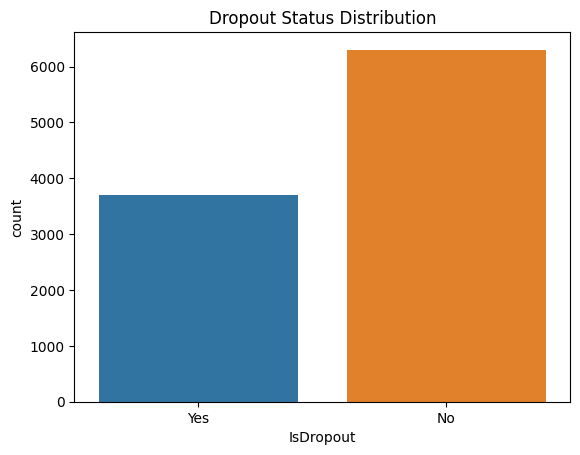

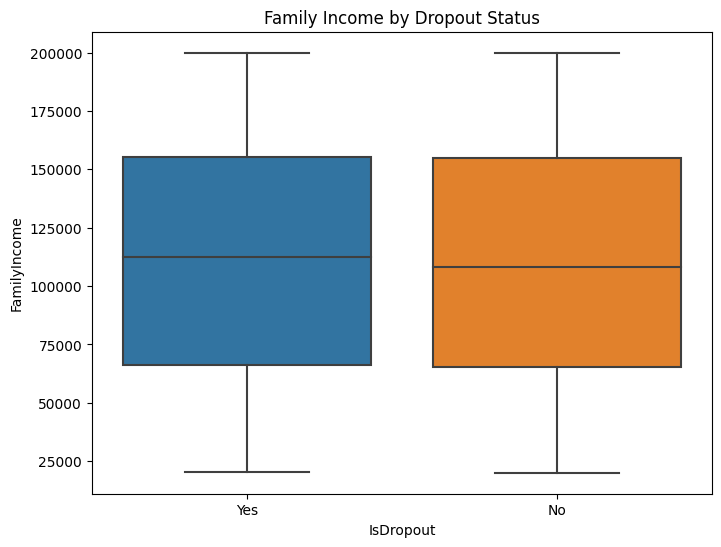

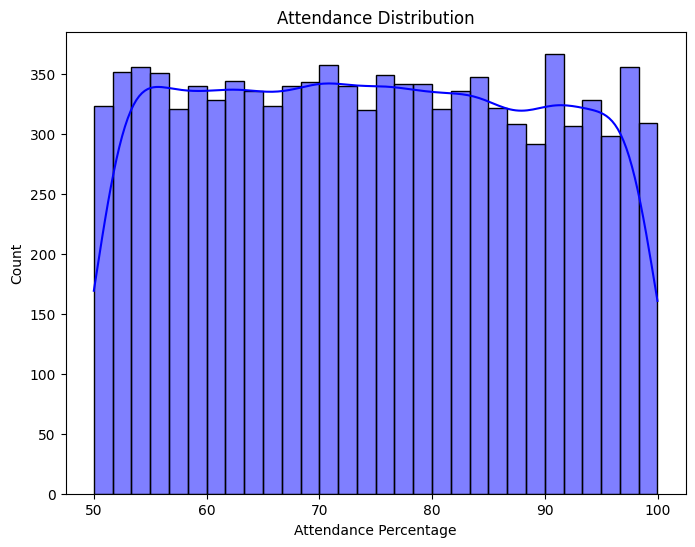

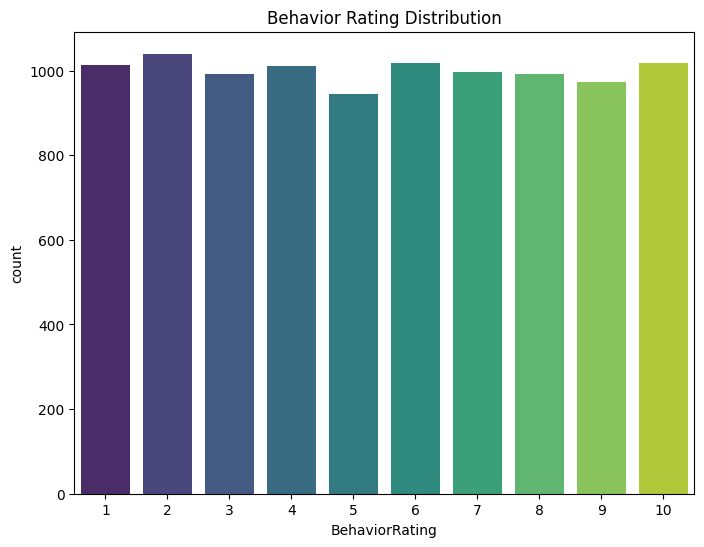

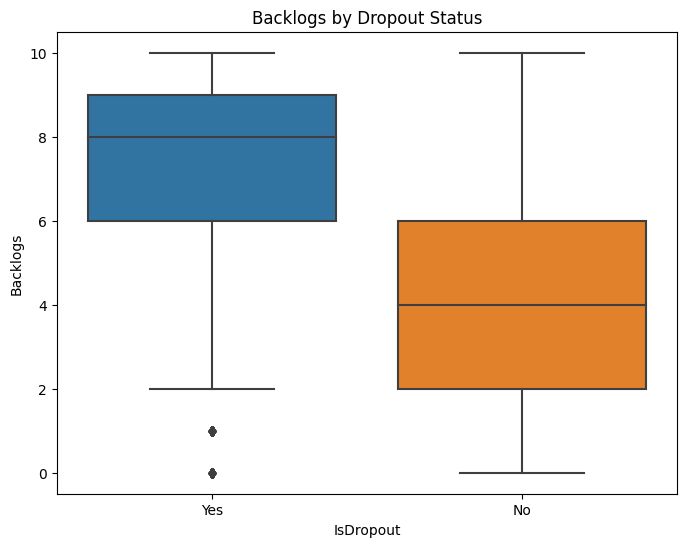

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("students_dataset.csv")


# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Summary statistics
print("\nSummary statistics of the dataset:")
print(data.describe())

# Distribution of 'IsDropout'
print("\nDistribution of Dropout Status:")
print(data['IsDropout'].value_counts())
sns.countplot(data=data, x='IsDropout')
plt.title("Dropout Status Distribution")
plt.show()


# Boxplot for family income by dropout status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="IsDropout", y="FamilyIncome")
plt.title("Family Income by Dropout Status")
plt.show()

# Attendance distribution
plt.figure(figsize=(8, 6))
sns.histplot(data["Attendance"], bins=30, kde=True, color='blue')
plt.title("Attendance Distribution")
plt.xlabel("Attendance Percentage")
plt.show()

# Behavior Rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="BehaviorRating", palette="viridis")
plt.title("Behavior Rating Distribution")
plt.show()

# Analyze Backlogs by Dropout Status
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x="IsDropout", y="Backlogs")
plt.title("Backlogs by Dropout Status")
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("students_dataset.csv")

print(data.head())
# Preprocessing
# Encode categorical data
label_encoder = LabelEncoder()
data["Gender"] = label_encoder.fit_transform(data["Gender"])  # Male=1, Female=0
data["IsDropout"] = label_encoder.fit_transform(data["IsDropout"])  # Yes=1, No=0

# Features and target
X = data.drop("IsDropout", axis=1)  # Features
y = data["IsDropout"]  # Target variable

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(kernel="linear", probability=True, random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


# Evaluate models
models = {
    "Logistic Regression": logistic_model,
    "SVM": svm_model,
   
}

for name, model in models.items():
    print(f"=== {name} ===")
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\n")


   Attendance  BehaviorRating     ClassX   ClassXII  Graduation  HealthIssues  \
0   68.727006               7  67.998744  25.779490   10.125356             0   
1   97.535715               4  43.462090  64.101015   62.159742             0   
2   86.599697               2  65.622005  73.504235   87.821742             0   
3   79.932924               5  61.789683  45.528489   29.914956             0   
4   57.800932               3  45.481779  13.525634   39.960951             0   

    FamilyIncome   PreviousFee  Backlogs  Gender  EducationLoan IsDropout  
0  122533.950993  39134.543942         7  Female              0       Yes  
1   30781.258447  47812.864208         3  Female              1        No  
2  186324.367030  26364.744303         2    Male              0        No  
3  161496.530327  38230.917421         6    Male              0        No  
4   99642.041973  43344.140662         6  Female              0       Yes  
=== Logistic Regression ===
Accuracy: 0.8325


=== SVM ==

In [5]:
import pandas as pd
import numpy as np

# Sample custom data
custom_data = pd.DataFrame({
    "Attendance": [68.727006, 97.535715, 86.599697, 79.932924, 57.800932],
    "BehaviorRating": [7, 4, 2, 5, 3],
    "ClassX": [67.998744, 43.462090, 65.622005, 61.789683, 45.481779],
    "ClassXII": [25.779490, 64.101015, 73.504235, 45.528489, 13.525634],
    "Graduation": [10.125356, 62.159742, 87.821742, 29.914956, 39.960951],
    "HealthIssues": [0, 0, 0, 0, 0],
    "FamilyIncome": [122533.950993, 30781.258447, 186324.367030, 161496.530327, 99642.041973],
    "PreviousFee": [39134.543942, 47812.864208, 26364.744303, 38230.917421, 43344.140662],
    "Backlogs": [7, 3, 2, 6, 6],
    "Gender": ["Female", "Female", "Male", "Male", "Female"],
    "EducationLoan": [0, 1, 0, 0, 0]
})

gender_mapping = {"Male": 1, "Female": 0}

# Encode Gender using the predefined mapping
custom_data["Gender"] = custom_data["Gender"].map(gender_mapping)

# Standardize numerical features
custom_data_scaled = scaler.transform(custom_data)

# Predict using each model
print("Predictions on custom data:")
for name, model in models.items():
    print(f"=== {name} ===")
    predictions = model.predict(custom_data_scaled)
    print("Predicted IsDropout:", predictions)
    print("\n")


Predictions on custom data:
=== Logistic Regression ===
Predicted IsDropout: [1 0 0 0 1]


=== SVM ===
Predicted IsDropout: [1 0 0 0 1]




In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of students
num_students = 10000

# Generate random data for columns
attendance = np.random.uniform(50, 100, num_students)  # Attendance percentage
behavior_rating = np.random.randint(1, 11, num_students)  # 1 (poor) to 10 (excellent)
class_x = np.random.uniform(10, 100, num_students)  # Class X percentage
class_xii = np.random.uniform(10, 100, num_students)  # Class XII percentage
graduation = np.random.uniform(10, 100, num_students)  # Graduation percentage
health_issues = np.random.choice([0, 1], num_students, p=[0.8, 0.2])  # 0 = no, 1 = yes
family_income = np.random.uniform(20000, 200000, num_students)  # Annual income
previous_fee = np.random.uniform(10000, 50000, num_students)  # Previous fee amount
backlogs = np.random.randint(0, 11, num_students)  # Number of backlogs
gender = np.random.choice(['Male', 'Female'], num_students)  # Gender
education_loan = np.random.choice([0, 1], num_students, p=[0.9, 0.1])  # 0 = no, 1 = yes

is_dropout = []

# Weights (percent contribution to dropout decision)
weights = {
    "class_x": 0.25,
    "class_xii": 0.25,
    "backlogs": 0.20,
    "behavior_rating": 0.15,
    "health_issues": 0.10,
    "education_loan": 0.05
}

# Determine dropout status based on weighted probabilities
for i in range(num_students):
    score = 0
    
    # Evaluate each factor and accumulate the score
    if class_x[i] < 33:
        score += weights["class_x"]
    if class_xii[i] < 33:
        score += weights["class_xii"]
    if backlogs[i] > 6:
        score += weights["backlogs"]
    if behavior_rating[i] < 3:
        score += weights["behavior_rating"]
    if health_issues[i] == 1:
        score += weights["health_issues"]
    if education_loan[i] == 1:
        score += weights["education_loan"]
    
    # Dropout if score exceeds a threshold
    is_dropout.append("Yes" if score > 0.3 else "No")

# Create the DataFrame
students_data = pd.DataFrame({
    "Attendance": attendance,
    "BehaviorRating": behavior_rating,
    "ClassX": class_x,
    "ClassXII": class_xii,
    "Graduation": graduation,
    "HealthIssues": health_issues,
    "FamilyIncome": family_income,
    "PreviousFee": previous_fee,
    "Backlogs": backlogs,
    "Gender": gender,
    "EducationLoan": education_loan,
    "IsDropout": is_dropout
})

# Save the dataset to a CSV file
students_data.to_csv("students_dataset.csv", index=False)

print("Dataset saved as 'students_dataset.csv'")